In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("StudentsPerformance.csv")
df.head()

Saving StudentsPerformance.csv to StudentsPerformance.csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


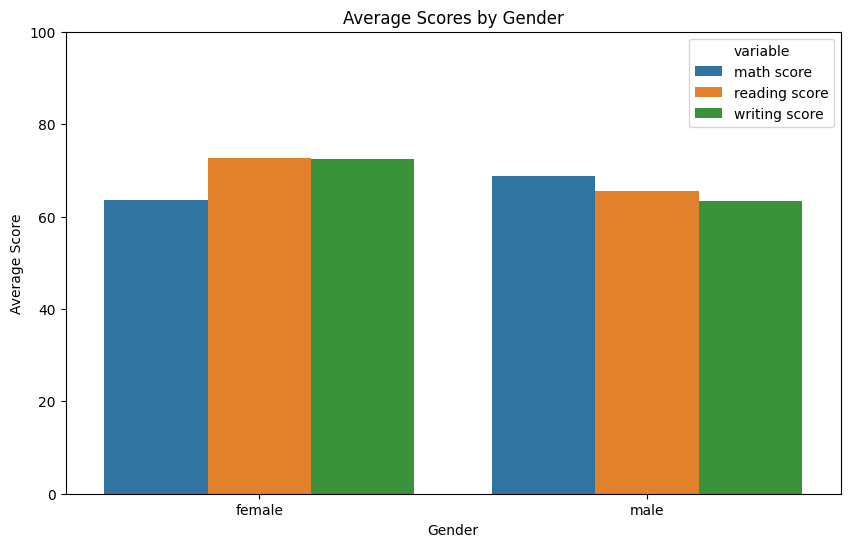

In [ ]:
# Calculate average scores by gender
avg_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()

# Plot using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='gender', y='value', hue='variable',
            data=pd.melt(avg_scores, id_vars='gender'))

plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.xlabel("Gender")
plt.ylim(0, 100)
plt.show()


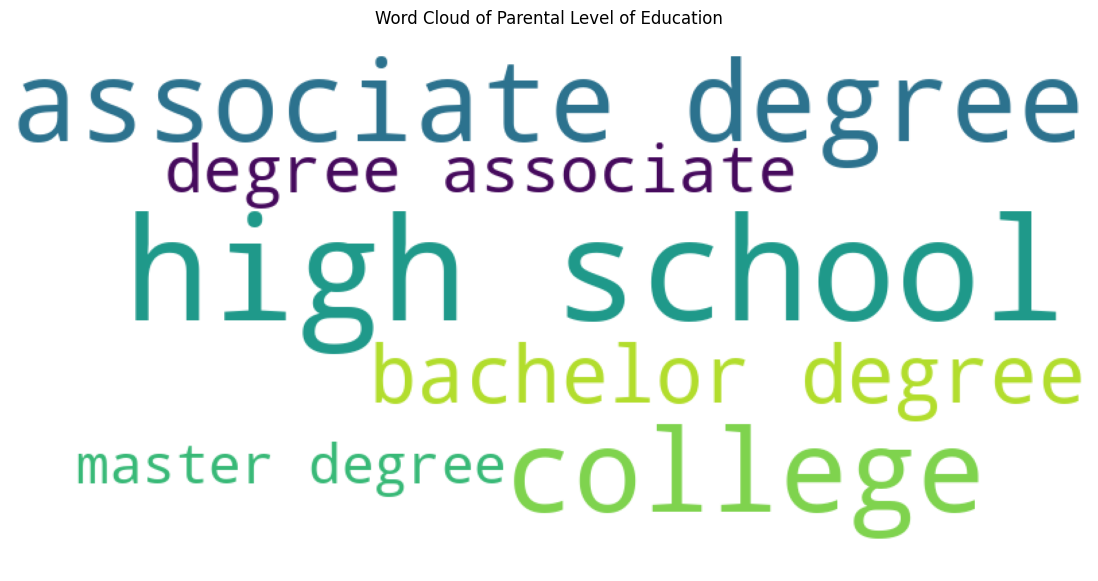

In [ ]:
# Combine all text from the column
text = " ".join(df['parental level of education'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='hamming')
plt.axis('off')
plt.title("Word Cloud of Parental Level of Education")
plt.show()


In [ ]:
text_itt = [text for text in df['parental level of education'].dropna()]
vectorizer = CountVectorizer(stop_words="english", max_features = 100)
x = vectorizer.fit_transform(text_itt)
word_freq = dict(zip(vectorizer.get_feature_names_out(), x.toarray().sum(axis = 0)))

In [ ]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1774 stored elements and shape (1000, 7)>
  Coords	Values
  (0, 1)	1
  (0, 3)	1
  (1, 2)	1
  (2, 3)	1
  (2, 5)	1
  (3, 3)	1
  (3, 0)	1
  (4, 2)	1
  (5, 3)	1
  (5, 0)	1
  (6, 2)	1
  (7, 2)	1
  (8, 4)	1
  (8, 6)	1
  (9, 4)	1
  (9, 6)	1
  (10, 3)	1
  (10, 0)	1
  (11, 3)	1
  (11, 0)	1
  (12, 4)	1
  (12, 6)	1
  (13, 2)	1
  (14, 3)	1
  (14, 5)	1
  :	:
  (986, 3)	1
  (986, 0)	1
  (987, 4)	1
  (987, 6)	1
  (988, 4)	1
  (988, 6)	1
  (989, 2)	1
  (990, 4)	1
  (990, 6)	1
  (991, 4)	1
  (991, 6)	1
  (992, 3)	1
  (992, 0)	1
  (993, 1)	1
  (993, 3)	1
  (994, 4)	1
  (994, 6)	1
  (995, 3)	1
  (995, 5)	1
  (996, 4)	1
  (996, 6)	1
  (997, 4)	1
  (997, 6)	1
  (998, 2)	1
  (999, 2)	1


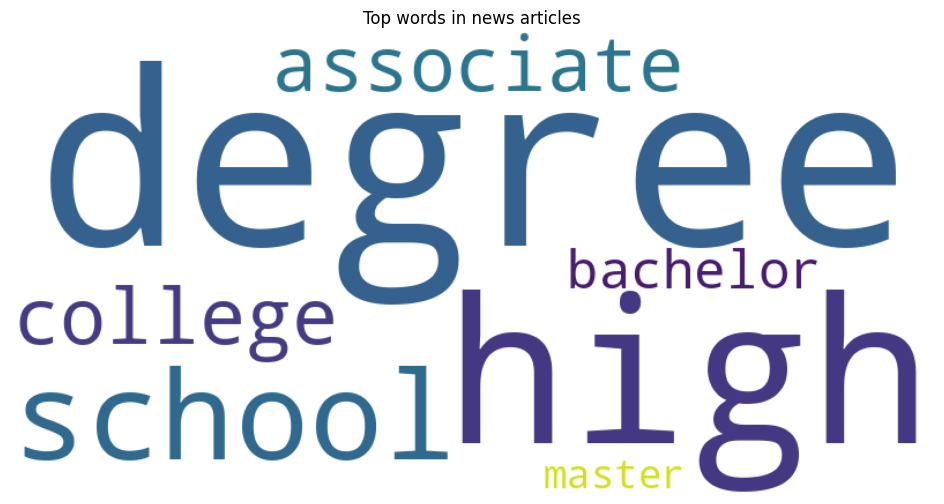

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="hamming")
plt.axis("off")
plt.title("Top words in news articles")
plt.show()